In [4]:
import pandas as pd
import numpy as np
import requests

In [5]:
def get_data(token):

    res = requests.get(
        f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )
    if res.json().get('error',0)!=0:
        res = requests.get(
            f'https://api.cryptowat.ch/markets/kraken/{token}usd/ohlc',
            params={
                'periods': '3600',
                'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
            }
        )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [6]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

In [7]:
df_lis = [get_data(token) for token in tokens]
df = pd.concat(df_lis,axis=0)

In [8]:
df['close_ratio']=df.loc[df['token'] == 'ETH', 'close']   /  df.loc[df['token'] == 'SOL', 'close']

In [9]:
df.groupby('token')['volumeUSD'].sum().to_frame().sort_values(by=['volumeUSD'])

volumeUSD
token              
FLOW   9.243792e+07
USDT   2.128105e+09
AVAX   3.950965e+09
SOL    7.666180e+09
ETH    2.337456e+10

In [10]:
df.rename(columns={'volumeUSD': 'volumeTerm', 'volume': 'volumeBase'}, inplace=True)

In [12]:
close=df.pivot(index='ts', columns='token', values='close')
close

token                  AVAX      ETH    FLOW      SOL    USDT
ts                                                           
2021-11-22 00:00:00  128.67  4262.99  14.150  230.785  1.0012
2021-11-22 01:00:00  134.85  4234.37  13.621  226.000  1.0013
2021-11-22 02:00:00  132.54  4217.89  13.753  227.037  1.0012
2021-11-22 03:00:00  133.38  4193.47  13.652  223.117  1.0011
2021-11-22 04:00:00  136.29  4168.35  13.581  220.652  1.0009
...                     ...      ...     ...      ...     ...
2021-12-16 18:00:00  103.66  4035.15   8.785  182.640  1.0002
2021-12-16 19:00:00  103.67  4026.61   8.766  183.230  1.0003
2021-12-16 20:00:00  101.78  3997.95   8.707  180.040  1.0001
2021-12-16 21:00:00  104.34  4019.77   8.740  183.440  1.0002
2021-12-16 22:00:00  105.05  4025.27   8.754  182.410  1.0002

[599 rows x 5 columns]

In [13]:
log_return = np.log(close/close.shift(1)).dropna(how='all',axis=0)
log_return

token                    AVAX       ETH      FLOW       SOL    USDT
ts                                                                 
2021-11-22 01:00:00  0.046912 -0.006736 -0.038102 -0.020952  0.0001
2021-11-22 02:00:00 -0.017279 -0.003900  0.009644  0.004578 -0.0001
2021-11-22 03:00:00  0.006318 -0.005806 -0.007371 -0.017417 -0.0001
2021-11-22 04:00:00  0.021583 -0.006008 -0.005214 -0.011109 -0.0002
2021-11-22 05:00:00 -0.031832 -0.002472 -0.014014 -0.015161 -0.0001
...                       ...       ...       ...       ...     ...
2021-12-16 18:00:00 -0.018637 -0.011340 -0.003069 -0.010295  0.0000
2021-12-16 19:00:00  0.000096 -0.002119 -0.002165  0.003225  0.0001
2021-12-16 20:00:00 -0.018399 -0.007143 -0.006753 -0.017563 -0.0002
2021-12-16 21:00:00  0.024841  0.005443  0.003783  0.018709  0.0001
2021-12-16 22:00:00  0.006782  0.001367  0.001601 -0.005631  0.0000

[598 rows x 5 columns]

In [14]:
correlation=log_return.corr()
correlation

token      AVAX       ETH      FLOW       SOL      USDT
token                                                  
AVAX   1.000000  0.649717  0.396980  0.635399 -0.004474
ETH    0.649717  1.000000  0.574316  0.749026 -0.106582
FLOW   0.396980  0.574316  1.000000  0.464544 -0.186943
SOL    0.635399  0.749026  0.464544  1.000000  0.103241
USDT  -0.004474 -0.106582 -0.186943  0.103241  1.000000

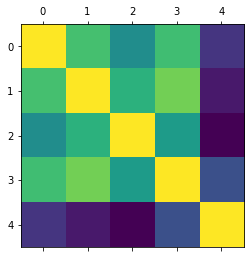

In [15]:
import matplotlib.pyplot as plt

plt.matshow(correlation)
plt.show()

In [16]:
l = [1,2,3,4,5]
def ok(x,y):
    return x + y 
reduce(ok,l)



NameError: name 'reduce' is not defined